## Exploratory Data Analysis of Wastewater Viral Activity Levels of SARS-CoV-2 (the virus that causes COVID-19)
### About the data
The Wastewater Viral Activity Level shows changes in SARS-CoV-2 virus levels in wastewater compared to the baseline level for each wastewater treatment plant. National and regional data represent the median values across all wastewater treatment plants in the respective area. The Wastewater Viral Activity Levels are categorized into minimal, low, moderate, high, or very high as follows:

- Less than 1.5 – Minimal
- Greater than 1.5 and up to 3 – Low
- Greater than 3 and up to 4.5 – Moderate
- Greater than 4.5 and up to 8 – High
- Greater than 8 – Very High

States and territories are grouped into the following U.S Census Bureau regions:

- West: Alaska, Arizona, California, Colorado, Guam, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, Wyoming (N=14)
- Midwest: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin (N=12)
- Northeast: Connecticut, Maine, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Puerto Rico, Rhode Island, Vermont (N=10)
- South: Arkansas, Alabama, Delaware, District of Columbia, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, Oklahoma, South Carolina, Tennessee, Texas, Virginia, West Virginia (N=17)


In [75]:
# import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data-table.csv', parse_dates=['date'])
df = df.drop(columns=['date_period'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       218 non-null    datetime64[ns]
 1   Midwest    218 non-null    float64       
 2   National   218 non-null    float64       
 3   Northeast  218 non-null    float64       
 4   South      218 non-null    float64       
 5   West       218 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 10.3 KB


In [76]:
# Dropping duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [77]:
# Check summary  statistics
df.describe()

,date,Midwest,National,Northeast,South,West
count,132,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2023-04-04 12:00:00,5.526384,5.313552,5.014469,5.151307,6.033989
min,2022-01-01 00:00:00,1.000000,1.123190,0.996486,0.984109,0.809371
25%,2022-08-18 06:00:00,2.321545,2.404320,1.999659,2.215349,2.875249
50%,2023-04-04 12:00:00,5.271535,4.580998,4.325728,3.873615,4.895709
75%,2023-11-19 18:00:00,6.923686,6.726434,6.287133,6.614752,7.147082
max,2024-07-06 00:00:00,20.115132,23.768241,26.855260,25.063503,35.416118
std,NaN,3.778676,3.944364,4.108963,4.068745,5.615215


Text(0, 0.5, 'Virus Levels')

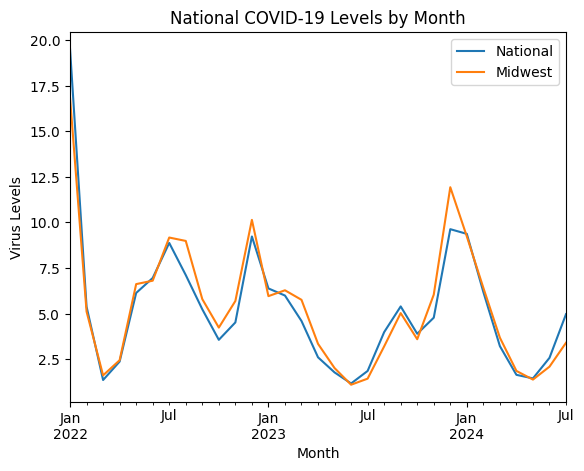

In [102]:
# National COVID-19 Levels by Month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
result = df.resample('MS', on='date')[['National', 'Midwest']].mean().plot()
result.set_title('National COVID-19 Levels by Month')
result.set_xlabel('Month')
result.set_ylabel('Virus Levels')

In [ ]:
# # Visualization
# sns.catplot(data=df, x='date', y='National')